# PHYS 210 Mini-Project 01
### Ordinary Differential Equations - Projectile motion in 2D
Due Wed, Nov 2, 2022 - 9am

#### Before getting started

1. Read the Mini-Project 01 background handout on CoCalc in the folder `Pre-class_Readings/Project_01-background/`
1. Read the grading rubric document in the "Mini-project 01" module on Canvas

#### The problem

Consider a soccer ball kicked across level ground at an an initial angle $\theta$. It lands again some distance $d$ away from the launch site. The equation of motion of the soccer ball, with turbulent air drag is: 

$$ m \frac{d\vec{v}}{dt} = -m g \hat{j} -b v \vec{v},$$

where $\vec{v}(t) = (v_x(t), v_y(t))$ is the projectile velocity at time $t$. The constant $b$ characterizes the atmospheric friction, treating the soccer ball as a smooth spherical object. We will integrate the equation of motion numerically in this project and compare the motion to our regular analytic expressions for projectile motion,

$$x(t) = v_0 t \cos\theta,$$
$$y(t) = v_0 t \sin\theta - \frac{1}{2} g t^2.$$

#### Objectives

You will implement a numerical solution of the differential equation with `solve_ivp()` and compare this trajectory, with drag, to the one you find to the analytic solution above, without drag. When calling `solve_ivp()` use `method='LSODA'` as it is often better behaved than the default method. You do not need to use the differential equation solver for the no drag analytic solution. You can simply calculate the x and y positions directly using the equations above

Use the following parameters and initial conditions:
- $b$ = 0.006 kg/m
- $g$ = 9.81 m/s$^2$
- $m$ = 0.45 kg
- $v_0$ = 18 m/s
- $\theta$ = 40 degrees above the horizonal

The questions you need to consider are:
- What is the distance $d$ to impact?
- What is the maximum height, $h_{max}$, reached?
- What is the time of flight, $t_{tof}$?
- What is the velocity (which is a vector), $\vec{v}_I$ at the impact point?
- By how much distance does drag reduce the range?

Your code should determine answers to these questions from the data returned by `solve_ivp()` (and your analytic solution for the final question), and print them to the screen.
Your code should continue to operate well if parameters like $c,$ $m$, $v_0$, and $\theta$ are changed - it should choose a sensible range of times to integrate over based on the parameters used.

Make a plot that shows the trajectory in the $x, y$ plane. The numerical solution should be shown as a series of about 20 points that are evenly spaced in time (so that the distance between them communicates the speed of the projectile) that are not connected by lines. On the same plot, show the analytical solution as a solid line (without points).

#### Further details

Note that the grading for the projects will be very, very different from the grading of the exercises. **Read the project marking rubric document before you start.** Feel free to add additional cells below to split your code up if you wish to.

In [1]:
# Initial declarations and imports
import matplotlib.pyplot as plt
import numpy as np
from scipy import integrate

# Constants given
b = 0.006
g = 9.81
m = 0.45
v_0 = 18
theta = np.radians(40)
vx0 = v_0 * np.cos(theta)
vy0 = v_0 * np.sin(theta)

t0 = 0.0  # initial time
tmax = 2.4  # maximum time
n = 10  # half of time steps
steps = 2 * n  # number of time steps
dt = (tmax - t0) / steps  # size of the time step
# initconds[x,y,dx,dy]
y0_arr = [0, 0, vx0, vy0]

In [2]:
# Main solution in this cell
def dydt_arr(t, y_arr):
    """
    Returns the changes in y_arr values with numerical
    derivatives for the drag based differential equation.
    t is required for integrate function, and
    y_arr contains 4 values: x position, y position,
    x velocity and y velocity. Outputs change in respective
    values by their derivatives,
    ie: f(t+dt) = f(t)+f'(t)/dt
    """
    vx = y_arr[2]  # x Velocity
    vy = y_arr[3]  # y Velocity

    speed = np.sqrt(vx ** 2 + vy ** 2)  # Speed
    dvx = -b * vx * speed / m  # Derivative of x velocity
    dvy = -g - b * vy * speed / m  # Derivative of y velocity

    return np.array([vx, vy, dvx, dvy])

def hit_ground(t,y):
    return y[0]
hit_ground.terminal = true
hit_ground.direction = -1

t_arr = np.linspace(t0, tmax, steps + 1)  # 1d time array

# Solve the differential equation:
sol = integrate.solve_ivp(dydt_arr, (t_arr[0], t_arr[-1]),
                          y0_arr,
                          t_eval=t_arr,
                          method='LSODA',
                          events = hit_ground)

# Analytical solution without drag component
analytical_x = vx0 * t_arr
analytical_y = t_arr * (vy0 - 1 / 2 * g * t_arr)

NameError: name 'true' is not defined

In [ ]:
t_sol = sol['t']  # getting time values
y_sol = sol['y']  # getting y0_arr values for each time step

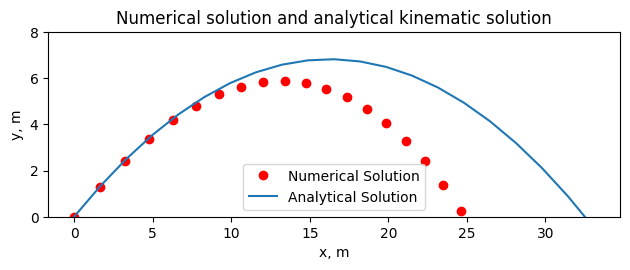

In [ ]:
# Plotting numerical solution
plt.subplot(211)
plt.plot(y_sol[0, :],
         y_sol[1, :],
         "ro",
         linewidth=0,
         label="Numerical Solution")
plt.xlabel('x, m')
plt.ylabel('y, m')
plt.ylim([0, 8])

# Plotting analytical solution
plt.title("Numerical solution and analytical kinematic solution")
plt.plot(analytical_x, analytical_y, label="Analytical Solution")
plt.legend()

plt.tight_layout()

plt.show()

In [ ]:
# Finding final value before y < 0
gtz = (y_sol[1, :] >= 0)  # filtering array for vals >=0
y_min_index = np.argmax(y_sol[0, gtz])
dist = y_sol[0, y_min_index]

flight_time = t_arr[y_min_index]

# Finding final velocity vector
final_xv = y_sol[2, y_min_index]
final_yv = y_sol[3, y_min_index]
final_speed = np.sqrt(final_xv ** 2 + final_yv ** 2)
final_angle = np.rad2deg(np.arctan(final_yv / final_xv))

gtz = (analytical_y >= 0)  # Filtering array for vals >=0
analytical_ymin = analytical_x[np.argmax(analytical_x[gtz])]

max_num_height = max(y_sol[1, :])  # Maximum numerical height

# Printing values found above
print("Numerical solution distance: {0:.2f}m".format(
    dist))
print("Max height: {0:.2f}m".format(
    max_num_height))
print("Flight Time: {0:.2f} s".format(
    flight_time))
print("Impact Velocity: {0:.3f}m/s at {1:.2f} deg".format(
    final_speed, final_angle))
print("Distance Diff: {0:.2f}m".format(
    analytical_ymin - dist))

Numerical solution distance: 24.64m
Max height: 5.88m
Flight Time: 2.16 s
Impact Velocity: 13.711m/s at -46.07 deg
Distance Diff: 6.80m


# Acknowledgements

In the cell below, please describe the role of **anyone other than yourself** who contributed to the work shown in this notebook.

Its ok to get help from us and classmates! Please get in the habit of acknowledging such contributions.

If you want to refer to a classmate, please use only their cocalc email-id and not their name - or you could just say something like: "a classmate gave me the idea to use xxx feature to solve yyy problem."


_Acknowledgements here:_

A classmate gave me the idea to plot maximum distance as a function of angle,
 but I came up with the maximum height myself

# Extension Code and Description
All solution code for the main project question should appear in the cell "cell-project1-main" above. Project extensions go in the cell "cell-extension" immediately below and the descriptions of your extension go in the cell below that.

maximum height possible changing theta: 13.666 m
corresponding angle: 90.0 degrees above horizon
maximum distance possible changing theta: 23.951 m
corresponding angle: 45.0 degrees above horizon


<function matplotlib.pyplot.show(close=None, block=None)>

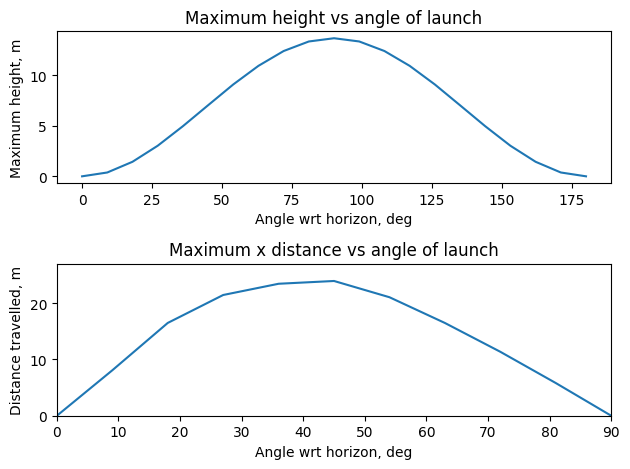

In [ ]:
theta = np.linspace(0, np.pi, steps + 1)
max_heights = []
max_dists = []

for angle in theta:
    # Changing velocity components wrt theta
    vx = v_0 * np.cos(angle)
    vy = v_0 * np.sin(angle)
    y0_arr[2] = vx
    y0_arr[3] = vy

    # Solve the differential equation:
    sol = integrate.solve_ivp(dydt_arr,
                              (t_arr[0], t_arr[-1]),
                              y0_arr,
                              t_eval=t_arr,
                              method='LSODA')
    y_sol = sol['y']

    max_height = max(y_sol[1, :])
    max_heights.append(max_height)

    gtz = (y_sol[1, :] >= 0)
    y_min_index = np.argmax(y_sol[0, gtz])  # Index of final point
    maximum_distance = y_sol[0, y_min_index]
    max_dists.append(maximum_distance)

max_height_angle = np.rad2deg(theta[np.argmax(max_heights)])
max_dist_angle = np.rad2deg(theta[np.argmax(max_dists)])

# Printing values found
print("maximum height possible changing theta: {0:.3f} m".format(
    max(max_heights)))
print("corresponding angle: {0:.1f} degrees above horizon".format(
    max_height_angle))
print("maximum distance possible changing theta: {0:.3f} m".format(
    max(max_dists)))
print("corresponding angle: {0:.1f} degrees above horizon".format(
    max_dist_angle))

# Plotting height vs angle
plt.subplot(2, 1, 1)
plt.title("Maximum height vs angle of launch")
plt.xlabel('Angle wrt horizon, deg')
plt.ylabel('Maximum height, m')
plt.plot(np.rad2deg(theta), max_heights)

# Plotting distance vs angle
plt.subplot(2, 1, 2)
plt.title("Maximum x distance vs angle of launch")
plt.xlabel('Angle wrt horizon, deg')
plt.ylabel('Distance travelled, m')
plt.plot(np.rad2deg(theta), max_dists)
plt.xlim([0, 90])
plt.ylim([0, 27])

plt.tight_layout()
plt.show


_In this cell, please describe any new language features or project extension you have implemented:_




# Grading cells
The cells below marked as "grade use only" are created as placeholders so that we can provide a manual grade and comments for each category. 

Exceptions are the "2. Style" test, which has an associated autograder test that you can run to check style and the timing cell "cell-optimization0", which you can use to test your code execution time.

In [ ]:
# 1. Code execution (grader use only)

In [ ]:
# 2. Style: pep8
#
# Tests for pep8 returns warnings or errors. You may need to hit 'Save' after making changes for them to take effect.
nb_name = "project01.ipynb"
cells_to_check = []
stop_at = ['cell-extension']
# check_style2.py uses cells_to_check and nb_name
%run -i check_style2.py

checking unnamed cell
checking cell: cell-project1-main
checking unnamed cell
checking unnamed cell
checking unnamed cell


In [ ]:
# 3. Results (grader use only)

In [ ]:
# 4. Readability (grader use only)

In [ ]:
# 5. Plot (grader use only)

In [ ]:
# Check execution time
nb_name = "project01.ipynb"
cells_to_time = ['cell-project1-main']
stop_at = []
%run -i time_cells2.py

Time for cell: cell-project1-main time: 0.00
Total time: 0.00


In [ ]:
# 5. Code optimization/timing (grader use only)

In [ ]:
# B2. New Functionality/Language features (grader use only)